In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # clear seaborn warnings

In [2]:
# import and inspect data

df_company = pd.read_csv('C:/Users/jake/Desktop/linear regression/1000_Companies.csv')
df_company.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# count of entries and attributes

df_company.shape

(1000, 5)

In [4]:
# count of null values

df_company.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
# non-null count and data types

df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [6]:
# descriptive statistics

df_company.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

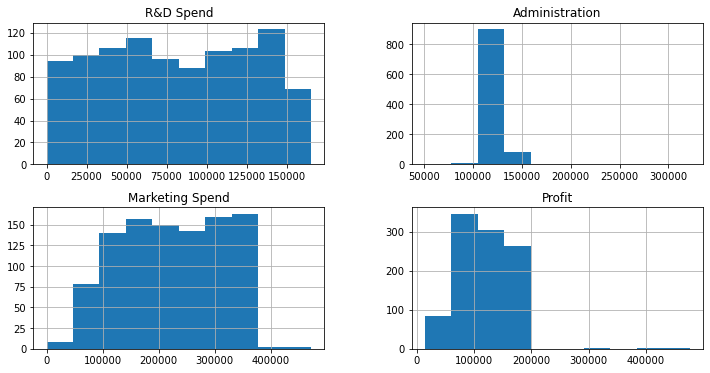

In [7]:
# distribution plots

df_company.hist(figsize=(12,6))

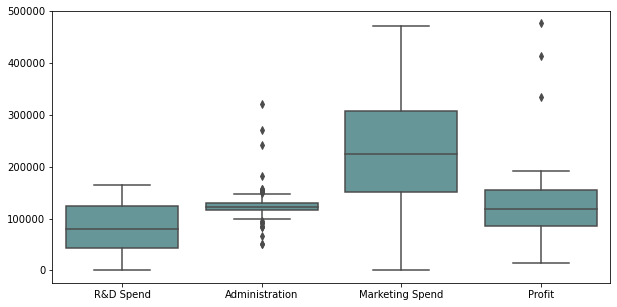

In [61]:
# outliers with box plots

plt.figure(figsize=(10,5))
sns.boxplot(data=df_company, color='cadetblue')
plt.show()

<AxesSubplot:>

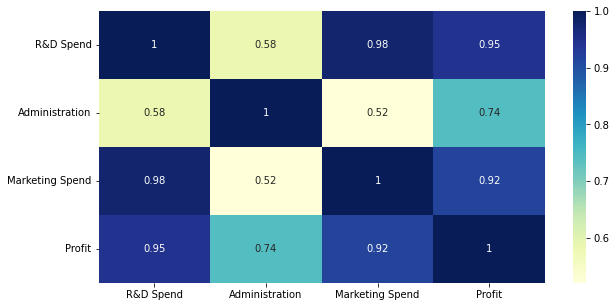

In [9]:
# correlation matrix

plt.figure(figsize=(10,5))
sns.heatmap(df_company.corr(), annot=True, cmap='YlGnBu')

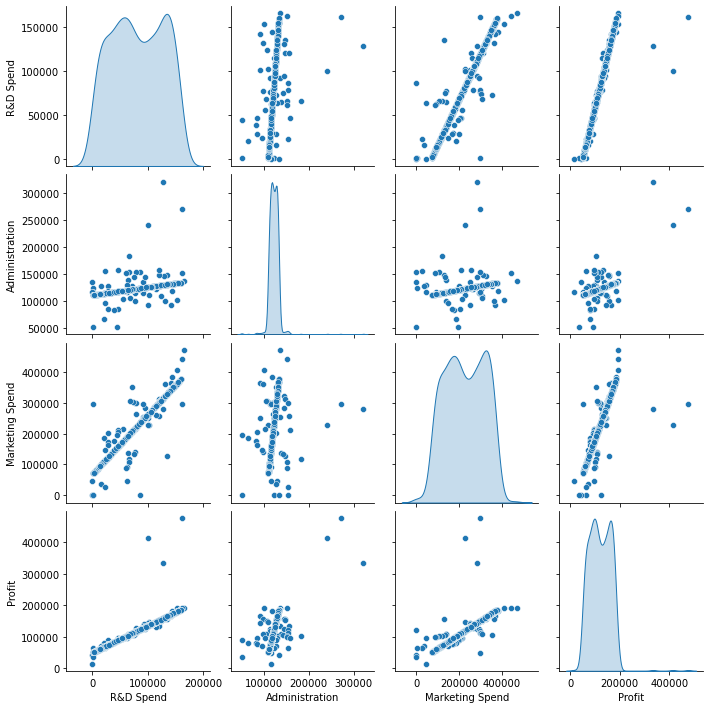

In [10]:
# pair plot

sns.pairplot(df_company, palette='coolwarm', diag_kind='kde', height=2.5)
plt.show()

In [32]:
# one-hot encode "State" attribute

State_dummies = pd.get_dummies(df_company['State'])
State_dummies.head(3)

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0


In [35]:
# create new DataFrame and add State encoded data(drop one column) to main DataFrame
df_company_encoded = pd.concat([df_company, State_dummies.drop('California', axis='columns')], axis='columns')

# drop categorical features
df_company_encoded.drop('State', axis='columns', inplace=True)

# inspect data
df_company_encoded.head(3)

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0


In [14]:
# split data into features and target

X = df_company_encoded.drop(['Profit'], axis='columns') # features/predictors
y = df_company_encoded['Profit'] # target

In [116]:
# train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [121]:
# initialize and train model
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# model test performance score (r2_score)
print(f'lin_reg_model test score: {lin_reg_model.score(X_test, y_test)}')

lin_reg_model test score: 0.9661775041163129


In [123]:
# cross validation model scores
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.91126959, 0.97198771, 0.91292283, 0.97582286, 0.94555969])

In [83]:
# predictions for the entire dataset

predictions = lin_reg_model.predict(X)

In [84]:
# # add predictions to original DataFrame in a new DataFrame
df_company_predict = pd.concat([df_company, pd.DataFrame(predictions, columns=['predicted'])], axis='columns')

In [85]:
# df_company_predict
df_company_predict.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit,predicted
0,165349.20,136897.80,471784.10,New York,192261.83,200529.398416
1,162597.70,151377.59,443898.53,California,191792.06,212490.849060
2,153441.51,101145.55,407934.54,Florida,191050.39,149255.694099


In [86]:
# add residuals to df_company_predict
df_company_predict['residuals'] = df_company_predict['Profit'] - df_company_predict['predicted']

In [87]:
df_company_predict.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit,predicted,residuals
0,165349.20,136897.80,471784.10,New York,192261.83,200529.398416,-8267.568416
1,162597.70,151377.59,443898.53,California,191792.06,212490.849060,-20698.789060
2,153441.51,101145.55,407934.54,Florida,191050.39,149255.694099,41794.695901


In [118]:
# predict the test set results
y_pred = lin_reg_model.predict(X_test)
y_pred

array([133751.38087283,  74389.53658937, 118268.83731287, 181836.93018576,
        99059.29522209, 167815.50293661, 139758.37282316, 127685.85464033,
        65450.27180765, 164030.90692225, 116841.12109563, 143158.33127932,
       142186.18895308, 168572.46176169,  68987.47838859, 121476.41118343,
       138025.66980778, 106467.37169638, 385351.69877636,  93999.45657193,
        70250.06146769,  77114.33097514, 145687.89107289, 172226.89496081,
       130599.11532865,  57009.79043441, 177261.97537157, 104570.54503339,
       109815.32045748, 183357.9065367 ,  65492.61712333, 170491.03846027,
       133676.4270915 , 109884.15230391, 167917.17415418, 181312.9996818 ,
        67211.26236979, 101983.71770842, 116296.75339817, 184683.34470624,
        85782.95888562, 156737.99870384, 182714.08419757, 116811.81126947,
       147111.14120871, 177068.39662465, 112557.39867041, 136417.71367651,
        52439.87548333, 127768.81696395, 101332.42107586, 178108.81006671,
       149692.47980003, 1

In [89]:
# coefficients
print(lin_reg_model.coef_)

[ 5.52993844e-01  1.08665448e+00  7.87486715e-02 -7.54850701e+02
  5.55638228e+01]


In [90]:
# target intercept
print(lin_reg_model.intercept_)

-76876.23335588507


### Model Improvement:  
log normal transformation  
standardise

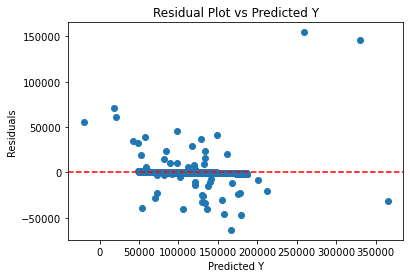

In [91]:
# plot residuals against predicted Y
plt.scatter(df_company_predict['predicted'], df_company_predict['residuals'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.title('Residual Plot vs Predicted Y')
plt.show()

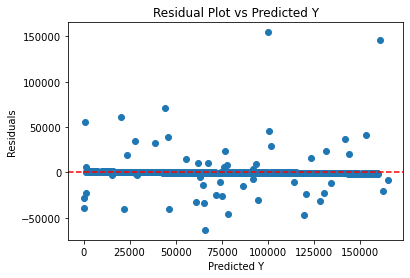

In [92]:
# plot residuals against predicted Y
plt.scatter(df_company_predict['R&D Spend'], df_company_predict['residuals'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.title('Residual Plot vs Predicted Y')
plt.show()